In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [9]:
df=pd.read_csv("C:/Users/DELL/Desktop/ogt.csv")

In [10]:
df

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190,94,29,105,40.8,231
1,14861698,female,20,166,60,14,94,40.3,66
2,11179863,male,69,179,79,5,88,38.7,26
3,16180408,female,34,179,71,13,100,40.5,71
4,17771927,female,27,154,58,10,81,39.8,35
...,...,...,...,...,...,...,...,...,...
995,18278454,male,50,185,83,13,97,40.3,74
996,11963638,female,46,151,52,25,113,40.5,183
997,17277065,male,38,185,91,5,82,39.2,15
998,15906490,male,30,189,95,21,103,40.8,123


In [11]:
df = df.drop(['User_ID'],axis=1)
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate',
       'Body_Temp', 'Calories'],
      dtype='object')

# Data Preprocessing:

In [12]:
df.describe()

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,42.964000,174.859000,75.503000,15.76200,95.939000,40.047200,92.033000
std,16.430114,14.347856,15.089987,8.31965,9.681064,0.766942,62.853309
min,20.000000,132.000000,38.000000,1.00000,69.000000,37.500000,1.000000
25%,29.000000,164.000000,63.000000,8.75000,89.000000,39.600000,36.750000
50%,40.000000,174.000000,75.000000,16.00000,96.500000,40.250000,83.000000
75%,56.000000,186.000000,87.000000,23.00000,103.000000,40.600000,141.000000
max,79.000000,212.000000,115.000000,30.00000,123.000000,41.400000,314.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      1000 non-null   object 
 1   Age         1000 non-null   int64  
 2   Height      1000 non-null   int64  
 3   Weight      1000 non-null   int64  
 4   Duration    1000 non-null   int64  
 5   Heart_Rate  1000 non-null   int64  
 6   Body_Temp   1000 non-null   float64
 7   Calories    1000 non-null   int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 62.6+ KB


### Missing Values

In [14]:
df.isnull().sum()

Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [15]:
# Shape of Dataset - (Num of Rows and Num of Columns)
df.shape
print("Number of Rows:",df.shape[0])
print("Number of Columns:",df.shape[1])

Number of Rows: 1000
Number of Columns: 8


# Data Visualition:

## Scatter plot:

Text(0.5, 1.0, 'Calories vs Duration')

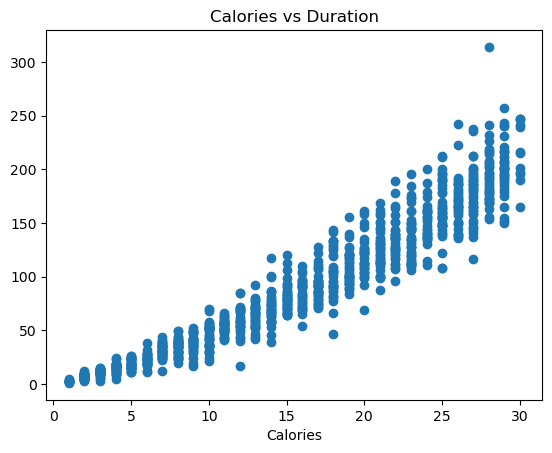

In [16]:
import matplotlib.pyplot as plt
plt.scatter(df['Duration'],df['Calories'])
plt.xlabel('Duration')
plt.xlabel('Calories')
plt.title('Calories vs Duration')


## SubPlot

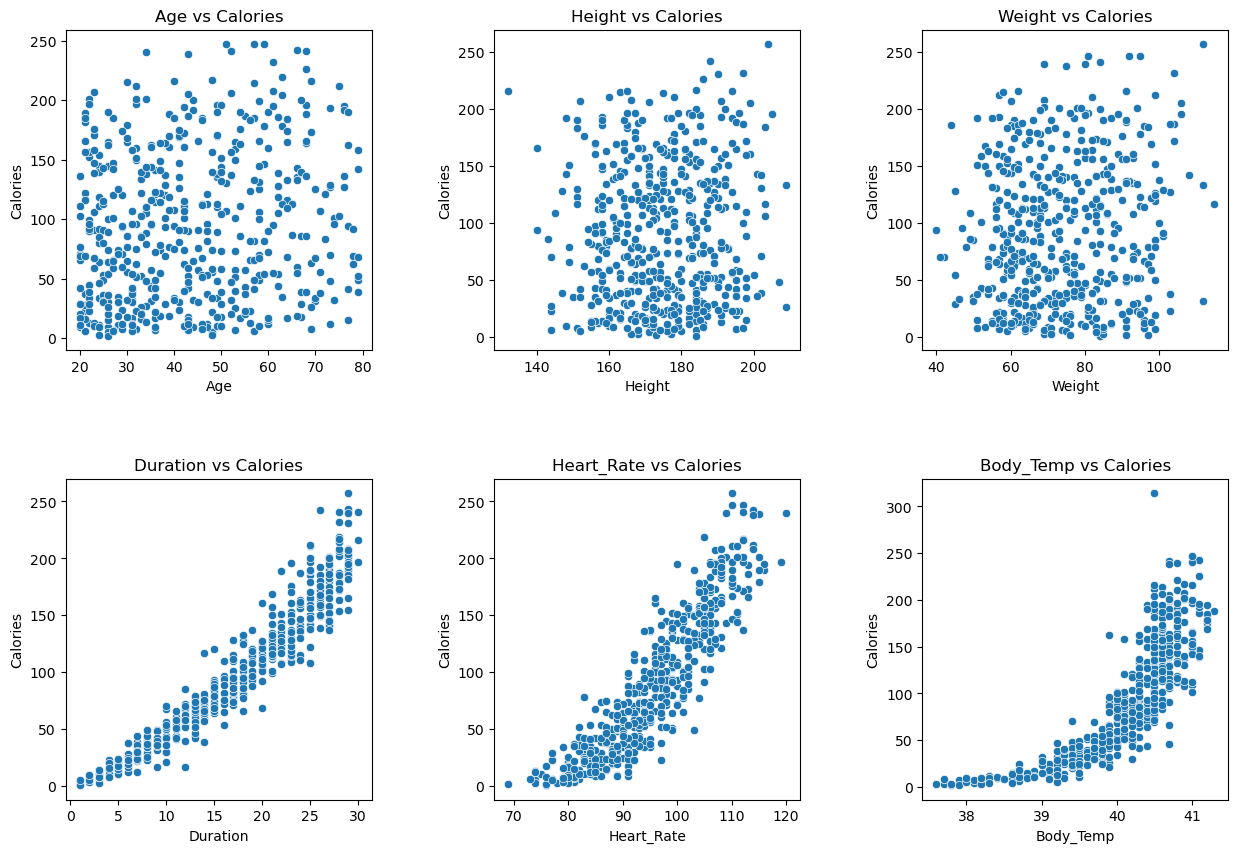

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming df is already defined
# df = pd.read_csv('your_data.csv')

features = ['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp']

plt.figure(figsize=(15, 10))

for i, col in enumerate(features):
    plt.subplot(2, 3, i + 1)  # Change to 2x3 grid
    x = df.sample(500)  # Ensure df has at least 500 rows
    sns.scatterplot(x=x[col], y=x['Calories'])
    plt.title(f'{col} vs Calories')

plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.show()


## Bar Chart

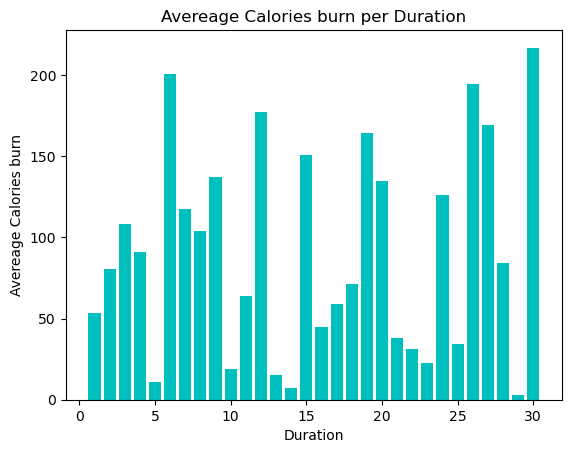

In [19]:
Duration=df['Duration'].unique()
Calories=df.groupby('Duration')['Calories'].mean()
plt.bar(Duration,Calories,color='c')
plt.xlabel('Duration')
plt.ylabel('Avereage Calories burn')
plt.title('Avereage Calories burn per Duration')
plt.show()

## Histogram: Distribution of Age.

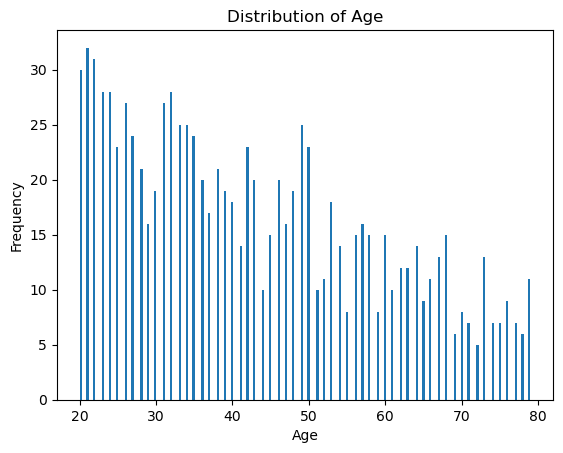

In [20]:
plt.hist(df['Age'],bins=200,)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

## Count Chart

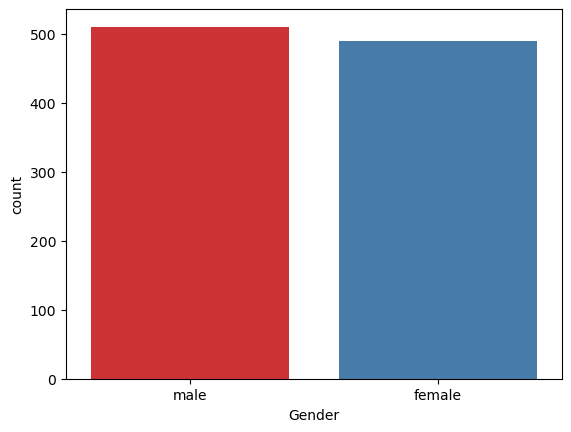

Gender
male      0.51
female    0.49
Name: proportion, dtype: float64

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x="Gender",data=df,palette="Set1")
plt.xlabel("Gender")
plt.ylabel("count")
plt.show()
df["Gender"].value_counts(normalize=True)

# Box Plot

<Axes: >

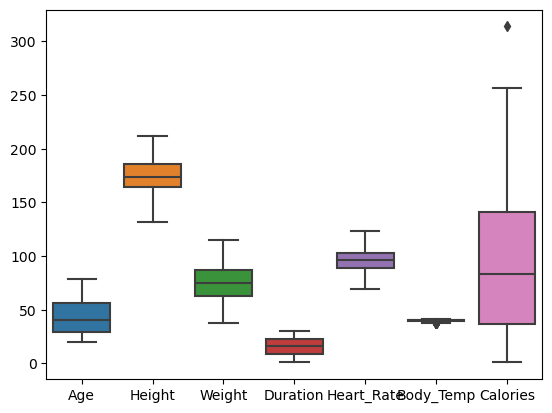

In [22]:
sns.boxplot(data=df)

C:\Users\DELL\AppData\Local\Temp\ipykernel_10256\1305753509.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '297.375' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df[i].clip(upper=ul,lower=ll,inplace=True)


<Axes: >

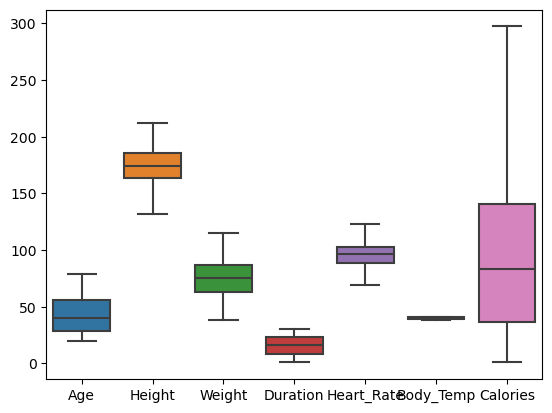

In [23]:
for i in df:
    if df[i].dtypes in ("float64","int64"):
        q1 = df[i].quantile(0.25)
        q3 = df[i].quantile(0.75)
        iqr = q3-q1
        ul = q3 + 1.5*iqr
        ll = q1 - 1.5*iqr
        df[i].clip(upper=ul,lower=ll,inplace=True)
sns.boxplot(data=df)

## Labeling the data:

In [24]:
from sklearn.preprocessing import LabelEncoder
cols=['Gender']
l = LabelEncoder()

for col in cols:
    df[col]=l.fit_transform(df[col])

In [25]:
df

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,1,68,190,94,29,105,40.8,231.0
1,0,20,166,60,14,94,40.3,66.0
2,1,69,179,79,5,88,38.7,26.0
3,0,34,179,71,13,100,40.5,71.0
4,0,27,154,58,10,81,39.8,35.0
...,...,...,...,...,...,...,...,...
995,1,50,185,83,13,97,40.3,74.0
996,0,46,151,52,25,113,40.5,183.0
997,1,38,185,91,5,82,39.2,15.0
998,1,30,189,95,21,103,40.8,123.0


# K-Nearest Neighbor Algorithm

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
import numpy as np

In [27]:
#Key Points:
#Data Inspection: It is important to inspect the data types of each column to identify which columns need encoding.
#One-Hot Encoding: Convert all categorical columns to numerical using one-hot encoding.
#Handle Missing Values: Ensure all missing values are handled appropriately.
#Standardization: Only standardize numeric columns to have a mean of 0 and a standard deviation of 1.
#Troubleshooting Tips:
#Check for Additional Categorical Data: Ensure there are no other string columns that need encoding.
#Missing Values: Confirm that missing values are filled appropriately to avoid NaNs.
#Data Types: Double-check that after encoding and filling missing values, all columns are numeric.
#By following these steps, you should be able to resolve the error and successfully apply the KNN algorithm to your dataset.
#If you still encounter issues, please provide more details or a sample of the dataset for further troubleshooting.

In [28]:
# Feature selection (exclude categorical and text features for simplicity)
features = df[['Gender','Age','Height','Weight','Duration','Heart_Rate','Body_Temp']]
target =df['Calories']

# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a kNN Regression model
k = 7  # Number of neighbors
knn_model = KNeighborsRegressor(n_neighbors=k)
knn_model.fit(X_train_scaled, Y_train)

Y_pred = knn_model.predict(X_test_scaled)
mse = mean_squared_error(Y_test, Y_pred)
print(f'Mean Squared Error: {mse}')
rmse= np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')
r2=r2_score(Y_test, Y_pred)
print(f'R Squared: {r2}')

Mean Squared Error: 90.0158163265306
Root Mean Squared Error: 9.487666537485948
R Squared: 0.9772832146278946


In [18]:
# Define the kNN model
knn = KNeighborsRegressor()

# Define the grid of hyperparameters
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Perform grid search
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, Y_train)

# Get the best parameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(f"Best Parameters: {best_params}")

# Predict and evaluate
Y_pred = best_model.predict(X_test_scaled)
mse = mean_squared_error(Y_test, Y_pred)
print(f'Mean Squared Error: {mse}')
rmse= np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')
r2=r2_score(Y_test, Y_pred)
print(f'R Squared: {r2}')

Best Parameters: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
Mean Squared Error: 84.56238974287317
Root Mean Squared Error: 9.195781083892394
R Squared: 0.9786594652280568


# Bagging Regressor

In [45]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [46]:
# Create a Bagging Regressor
bagging_model = BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=100, random_state=42)
bagging_model.fit(X_train, Y_train)

# Make predictions and evaluate the model
Y_pred = bagging_model.predict(X_test)
mse = mean_squared_error(Y_test, Y_pred)
print(f"Mean Squared Error with Bagging: {mse}")
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
print(f'Root Mean Square Error: {rmse}')
r2=r2_score(Y_test, Y_pred)
print(f'R Squared: {r2}')

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Mean Squared Error with Bagging: 43.46151722656249
Root Mean Square Error: 6.592534962103917
R Squared: 0.9890318612986806


In [48]:
# Define the parameter grid
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_samples': [0.5, 0.7, 1.0],
    'max_features': [0.5, 0.7, 1.0],
}

# Grid Search CV
grid_search = GridSearchCV(estimator=bagging_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, Y_train)

# Best parameters and model evaluation
print("Best parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
Y_pred = best_model.predict(X_test)
mse = mean_squared_error(Y_test, Y_pred)
print(f"Mean Squared Error with Bagging: {mse}")
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
print(f'Root Mean Square Error: {rmse}')
r2=r2_score(Y_test, Y_pred)
print(f'R Squared: {r2}')

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Best parameters: {'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 100}
Mean Squared Error with Bagging: 43.46151722656249
Root Mean Square Error: 6.592534962103917
R Squared: 0.9890318612986806


# Boosting Regressor

In [49]:
from sklearn.ensemble import GradientBoostingRegressor

# Create a Gradient Boosting Regressor
boosting_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
boosting_model.fit(X_train, Y_train)

# Make predictions and evaluate the model
Y_pred = boosting_model.predict(X_test)
mse = mean_squared_error(Y_test, Y_pred)
print(f"Mean Squared Error with Boosting: {mse}")
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
print(f'Root Mean Square Error: {rmse}')
r2=r2_score(Y_test, Y_pred)
print(f'R Squared: {r2}')

Mean Squared Error with Boosting: 20.59489141853934
Root Mean Square Error: 4.538159474780425
R Squared: 0.9948025830658508


In [27]:
# Define the bagging model with boosting as the base estimator
bagging_boosting_model = BaggingRegressor(base_estimator=boosting_model, random_state=42)

# Define the parameter grid
param_grid = {
    'base_estimator__n_estimators': [100, 200],
    'base_estimator__learning_rate': [0.01, 0.1],
    'base_estimator__max_depth': [3, 4],
    'n_estimators': [10, 20],
    'max_samples': [0.8, 1.0],
    'max_features': [0.8, 1.0]
}

# Grid Search CV
grid_search = GridSearchCV(estimator=bagging_boosting_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, Y_train)

# Best parameters and model evaluation
print("Best parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

Y_pred = best_model.predict(X_test)
mse = mean_squared_error(Y_test, Y_pred)
print(f"Mean Squared Error with Boosting: {mse}")
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
print(f'Root Mean Square Error: {rmse}')
r2=r2_score(Y_test, Y_pred)
print(f'R Squared: {r2}')

C:\Users\spsha\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Best parameters: {'base_estimator__learning_rate': 0.1, 'base_estimator__max_depth': 3, 'base_estimator__n_estimators': 200, 'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 20}
Mean Squared Error with Boosting: 17.327166380726027
Root Mean Square Error: 4.162591305992702
R Squared: 0.9956272404579449


# Stacking Regressor

In [51]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.ensemble import StackingRegressor
from sklearn.metrics import mean_squared_error

In [52]:
# Step 3: Define Base Models
base_models = [
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingRegressor(n_estimators=100, random_state=42)),
    ('svr', SVR(kernel='rbf', C=1.0, epsilon=0.1))
]

# Step 4: Define the Meta-Model
meta_model = LinearRegression()

# Step 5: Create the Stacking Ensemble
stacking_model = StackingRegressor(estimators=base_models, final_estimator=meta_model)

# Step 6: Train and Evaluate the Model
stacking_model.fit(X_train, Y_train)
Y_pred = stacking_model.predict(X_test)

# Evaluate the performance
mse = mean_squared_error(Y_test, Y_pred)
print(f"Mean Squared Error: {mse:.2f}")
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
print(f'Root Mean Square Error: {rmse}')
r2=r2_score(Y_test, Y_pred)
print(f'R Squared: {r2}')

Mean Squared Error: 21.98
Root Mean Square Error: 4.688651942989242
R Squared: 0.9944521585677815


In [84]:
# Step 3: Define Base Models with Hyperparameters for Grid Search
base_models = [
    ('rf', RandomForestRegressor(random_state=42)),
    ('gb', GradientBoostingRegressor(random_state=42)),
    ('svr', SVR())
]

# Define parameter grids for each base model
param_grid = {
    'rf__n_estimators': [50, 100],
    'rf__max_depth': [None, 10, 20],
    'gb__n_estimators': [50, 100],
    'gb__learning_rate': [0.01, 0.1],
    'svr__C': [0.1, 1.0, 10],
    'svr__epsilon': [0.1, 0.2]
}

# Step 4: Define the Meta-Model with Hyperparameters for Grid Search
meta_model = LinearRegression()

# Step 5: Create the Stacking Ensemble
stacking_model = StackingRegressor(estimators=base_models, final_estimator=meta_model)

# Step 6: Perform Grid Search CV
grid_search = GridSearchCV(estimator=stacking_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, Y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Step 7: Train and Evaluate the Best Model
Y_pred = best_model.predict(X_test)

# Evaluate the performance
mse = mean_squared_error(Y_test, Y_pred)
print(f"Best Model Mean Squared Error: {mse:.2f}")
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
print(f'Root Mean Square Error: {rmse}')
r2=r2_score(Y_test, Y_pred)
print(f'R Squared: {r2}')

Best Model Mean Squared Error: 67.71
Root Mean Square Error: 8.22885168829769
R Squared: 0.9839734740318277


# Voting Regressor

In [55]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import mean_squared_error

In [56]:
# Step 3: Define Base Models
base_models = [
    ('lr', LinearRegression()),
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingRegressor(n_estimators=100, random_state=42)),
    ('svr', SVR(kernel='rbf', C=1.0, epsilon=0.1))
]

# Step 4: Create the Voting Regressor
voting_regressor = VotingRegressor(estimators=base_models)

# Step 5: Train and Evaluate the Model
voting_regressor.fit(X_train, Y_train)
Y_pred = voting_regressor.predict(X_test)

# Evaluate the performance
mse = mean_squared_error(Y_test, Y_pred)
print(f"Voting Regressor Mean Squared Error: {mse:.2f}")
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
print(f'Root Mean Square Error: {rmse}')
r2=r2_score(Y_test, Y_pred)
print(f'R Squared: {r2}')

Voting Regressor Mean Squared Error: 217.38
Root Mean Square Error: 14.743772855896442
R Squared: 0.9451413250537287


In [83]:
# Step 3: Define Base Models with Hyperparameters for Grid Search
base_models = [
    ('rf', RandomForestRegressor(random_state=42)),
    ('gb', GradientBoostingRegressor(random_state=42)),
    ('svr', SVR())
]

# Define parameter grids for each base model
param_grid = {
    'rf__n_estimators': [50, 100],
    'rf__max_depth': [None, 10, 20],
    'gb__n_estimators': [50, 100],
    'gb__learning_rate': [0.01, 0.1],
    'svr__C': [0.1, 1.0, 10],
    'svr__epsilon': [0.1, 0.2]
}

# Step 4: Create the Voting Regressor
voting_regressor = VotingRegressor(estimators=base_models)

# Step 5: Perform Grid Search CV
grid_search = GridSearchCV(estimator=voting_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, Y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Step 6: Train and Evaluate the Best Model
Y_pred = best_model.predict(X_test)

# Evaluate the performance
mse = mean_squared_error(Y_test, Y_pred)
print(f"Best Model Mean Squared Error: {mse:.2f}")
rmse=np.sqrt(mse)
print(f'Root Mean Squared Error:{rmse}')
r2=r2_score(Y_test, Y_pred)
print(f'R Squared: {r2}')

Best Model Mean Squared Error: 282.47
Root Mean Squared Error:16.806862940688784
R Squared: 0.9331449468270953


# linear regression

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error

In [59]:
model = LinearRegression()
model.fit(X_train, Y_train)
coefficients = model.coef_
model = LinearRegression()
model.fit(X_train, Y_train)

coefficients = pd.DataFrame({'Feature': X_train.columns,'Coefficient': model.coef_})
coefficients

X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.2, random_state=0)
model = LinearRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
mse = mean_squared_error(Y_test, Y_pred)
print(f"Mean Squared Error: {mse}")
rmse=np.sqrt(mse)
print(f'root Mean Squared Error: {rmse}')
rmse
r2=r2_score(Y_test,Y_pred)
print(f' R^2:{r2}')

Mean Squared Error: 118.29170405883073
root Mean Squared Error: 10.876198971094208
 R^2:0.9662864134240128


In [69]:
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.2, random_state=0)
model = LinearRegression()
model.fit(X_train, Y_train)

param_grid = {
    'fit_intercept': [True, False],
    'copy_X': [True, False]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(X_train, Y_train)
best_model = grid_search.best_estimator_
Y_pred = best_model.predict(X_test)
mse = mean_squared_error(Y_test, Y_pred)
print(f"Best Model Mean Squared Error: {mse}")
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")
mse = mean_squared_error(Y_test, Y_pred)
print(f"Mean Squared Error: {mse}")
rmse=np.sqrt(mse)
print(f'Root Mean Squared Error:{rmse}')

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Model Mean Squared Error: 130.01001066539936
Best Parameters: {'copy_X': True, 'fit_intercept': True}
Mean Squared Error: 130.01001066539936
Root Mean Squared Error:11.402193239258812


# Support Vector Regression (SVR)

In [60]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [61]:
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.2, random_state=0)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


svr_model = SVR(kernel='rbf')  
svr_model.fit(X_train_scaled, Y_train)


Y_pred = svr_model.predict(X_test_scaled)
Y_pred

mse = mean_squared_error(Y_test, Y_pred)
print(f'Mean Squared Error: {mse}')
rmse=np.sqrt(mse)
print(f'root Mean Squared Error: {rmse}')
rmse

Mean Squared Error: 974.715402444074
root Mean Squared Error: 31.220432451266174


31.220432451266174

In [82]:
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.2, random_state=0)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
svr = SVR()

param_grid = {'kernel': ['rbf'],'C': [0.1, 1, 1],'gamma': ['scale', 'auto'], 'epsilon': [0.1, 0.2, 0.5]} 
# kernel type: linear or radial basis function (gaussian)            
# regularization parameter# kernel coefficient (for 'rbf' kernel) 
# epsilon parameter in SVR

grid_search = GridSearchCV(estimator=svr, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=-1)

grid_search.fit(X_train_scaled, Y_train)
print("Best parameters found: ", grid_search.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(grid_search.best_score_)))
best_model = grid_search.best_estimator_
Y_pred = best_model.predict(X_test_scaled)

mse = mean_squared_error(Y_test, Y_pred)
print(f'Mean Squared Error: {mse}')
rmse=np.sqrt(mse)
print(f'root Mean Squared Error: {rmse}')
rmse

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best parameters found:  {'C': 1, 'epsilon': 0.5, 'gamma': 'auto', 'kernel': 'rbf'}
Lowest RMSE found:  45.78069401136344
Mean Squared Error: 1941.0680270174316
root Mean Squared Error: 44.057553575039


44.057553575039

# Decision Tree Regression

In [62]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
from sklearn.model_selection import GridSearchCV

In [63]:
model_dt = DecisionTreeRegressor(random_state=5)

# Train the model
model_dt.fit(X_train, Y_train)

# Make predictions
Y_pred = model_dt.predict(X_test)

# Evaluate the model
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, Y_pred)

print("Decision Tree Regression:")
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R^2 Score: {r2}')

Decision Tree Regression:
Mean Squared Error: 124.71875
Root Mean Squared Error: 11.167754922096025
R^2 Score: 0.9692536175854588


In [67]:
# Define the Decision Tree Regressor model
model_dt = DecisionTreeRegressor(random_state=5)

# Define the parameter grid
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid Search CV
grid_search = GridSearchCV(estimator=model_dt, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, Y_train)

#best parameters 
print("Best parameters found: ", grid_search.best_params_)
print("Best negative mean squared error: ", grid_search.best_score_)

# Evaluate the best model on test data
best_model = grid_search.best_estimator_
Y_pred = best_model.predict(X_test)
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, Y_pred)

print("\nBest Model Evaluation:")
print(f'Best Model Mean Squared Error: {mse}')
print(f'Best Model Root Mean Squared Error: {rmse}')
print(f'Best Model R^2 Score: {r2}')

Best parameters found:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best negative mean squared error:  -158.6000841119889

Best Model Evaluation:
Best Model Mean Squared Error: 121.07259114583334
Best Model Root Mean Squared Error: 11.003299102807
Best Model R^2 Score: 0.9701524896032939


# Random Forest Algorithm 

* Random Forest or random decision forest is an ensemble learning method for classification, regression.
* Random decision forests correct for decision tree's habit overfitting to their trainning set.
* Step1 : Create Bootstrap Dataset from Original data by randomly choosing data(repetation is allowed)
* Step2 : Create Randomized Decision Tress from Bootstap dataset.
* Step3 : Finally output of the random foresr is the class selected by most trees.

In [64]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest Regression model
model_rf = RandomForestRegressor(n_estimators=100, random_state=5)

# Train the model
model_rf.fit(X_train, Y_train)

# Make predictions
Y_pred = model_rf.predict(X_test)

# Evaluate the model
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, Y_pred)

print("Random Forest Regression:")
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R^2 Score: {r2}')

Random Forest Regression:
Mean Squared Error: 52.055866552734386
Root Mean Squared Error: 7.214975159536891
R^2 Score: 0.9871668888603302


In [44]:
from sklearn.model_selection import GridSearchCV

# Define the RandomForestRegressor
model_rf = RandomForestRegressor(random_state=5)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


# Define the scoring methods 
scoring = {
    'MSE': make_scorer(mean_squared_error),
    'R^2': make_scorer(r2_score)
}

# Model
grid_search = GridSearchCV(estimator=model_rf, param_grid=param_grid, 
                           scoring=scoring, refit='MSE', cv=5, verbose=1, n_jobs=-1)

# To fit GridSearchCV
grid_search.fit(X_train, Y_train)

# Best parameters and best score found by GridSearchCV
print("Best parameters found by GridSearchCV:")
print(grid_search.best_params_)
print("Best score (MSE) found by GridSearchCV:")
print(grid_search.best_score_)

# Make predictions with the best estimator
best_model = grid_search.best_estimator_
Y_pred = best_model.predict(X_test)

# Evaluate the best model
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, Y_pred)

# Print evaluation metrics of the best model
print("\nEvaluation metrics of the best model:")
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R^2 Score: {r2}')

Fitting 5 folds for each of 486 candidates, totalling 2430 fits
Best parameters found by GridSearchCV:
{'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Best score (MSE) found by GridSearchCV:
174.69406836372428

Evaluation metrics of the best model:
Mean Squared Error: 101.94121353808399
Root Mean Squared Error: 10.096594155361696
R^2 Score: 0.9733805689048268


In [72]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score

In [85]:
# Example, adjust parameters as needed
Data = {'model' :  ['Linear Regression','KNN','Decision Tree','Random Forest','Bagging','Neural network','Gradient Boosting','Stacking','Voting','SVR'],
        'RMSE' : ['10.884892155104609','9.500316858303371','11.446055876237509','6.799118845348324','6.525038199121902','2.7536157433294144',
                  '4.382597100667815','4.484646658003713','14.746560807999098','39.3042369908456'],
        'Grid Search CV' : ['11.501709348224056','9.195781083892394','13.790040861606236','10.096594155361696','6.525038199121902',
                            '9.24954291251624','4.162591305992702','4.485674541025543','7.268892606860348','36.00376117041583']
}
print(pd.DataFrame(Data))

               model                RMSE      Grid Search CV
0  Linear Regression  10.884892155104609  11.501709348224056
1                KNN   9.500316858303371   9.195781083892394
2      Decision Tree  11.446055876237509  13.790040861606236
3      Random Forest   6.799118845348324  10.096594155361696
4            Bagging   6.525038199121902   6.525038199121902
5     Neural network  2.7536157433294144    9.24954291251624
6  Gradient Boosting   4.382597100667815   4.162591305992702
7           Stacking   4.484646658003713   4.485674541025543
8             Voting  14.746560807999098   7.268892606860348
9                SVR    39.3042369908456   36.00376117041583


<Axes: >

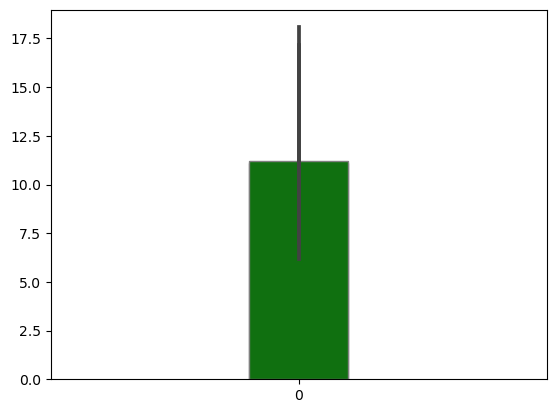

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
barWidth = 0.2
# Create the bars
sns.barplot(Data['RMSE'], color='blue', width=barWidth, edgecolor='grey', label='RMSE')
sns.barplot(Data['Grid Search CV'], color='green', width=barWidth, edgecolor='grey', label='Grid Search CV')

# # Add xticks on the middle of the group bars
# plt.xlabel('Model', fontweight='bold')
# plt.xticks([r + barWidth/2 for r in range(len(Data['model']))], Data['model'], rotation=45, ha='right')

# # Add labels, title, and legend
# plt.ylabel('Scores')
# plt.title('Comparison of RMSE and Grid Search CV for Different Models')
# plt.legend()

# # Display the plot
# plt.tight_layout()
# plt.show()

<BarContainer object of 30 artists>

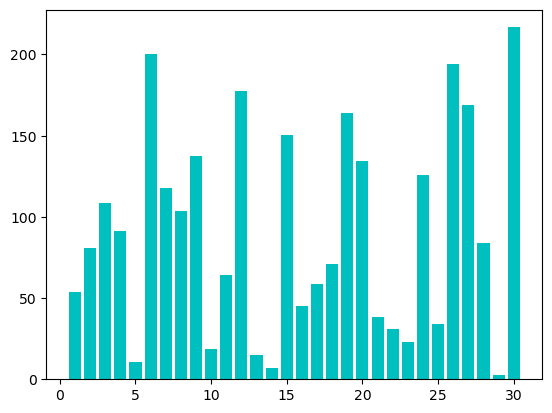

In [87]:
plt.bar(Duration,Calories,color='c')


In [88]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Assuming the DataFrame 'df' is already defined and contains the data.

# Drop rows with missing target values
df = df.dropna(subset=['Calories'])

# Define the feature columns and target column
feature_cols = [
    'Gender','Age','Height','Weight','Duration','Heart_Rate','Body_Temp'
]
target_col = 'Calories'

# Separate features and target
X = df[feature_cols]
Y = df[target_col]

# Ensure all genre columns are of integer type (0 or 1)
genre_cols = [
    'Gender','Age','Height','Weight','Duration','Heart_Rate','Body_Temp'
]

X[genre_cols] = X[genre_cols].astype(int)

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize and train the decision tree model
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, Y_train)

# Extract feature importances
feature_importances = model.feature_importances_

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': feature_cols,
    'Importance': feature_importances*100
})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importances
print(importance_df)

      Feature  Importance
4    Duration   91.750648
5  Heart_Rate    4.221011
1         Age    2.797569
2      Height    0.566075
3      Weight    0.504098
0      Gender    0.121675
6   Body_Temp    0.038923


C:\Users\DELL\AppData\Local\Temp\ipykernel_10256\891600403.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[genre_cols] = X[genre_cols].astype(int)


In [16]:
sum(feature_importances)

0.9999999999999999

In [89]:
# Determine a threshold for feature importance (e.g., mean importance)
threshold = importance_df['Importance'].mean()

# Select features above the threshold
selected_features = importance_df[importance_df['Importance'] >= threshold]['Feature'].tolist()

# Create a new DataFrame with selected features
X_selected = X[selected_features]

# Split the data into training and testing sets with selected features
X_train_selected, X_test_selected, Y_train_selected, Y_test_selected = train_test_split(X_selected, Y, test_size=0.2, random_state=42)

# Retrain the model with the selected features
model_selected = DecisionTreeRegressor(random_state=42)
model_selected.fit(X_train_selected, Y_train_selected)

# Evaluate the model
train_score = model_selected.score(X_train_selected, Y_train_selected)
test_score = model_selected.score(X_test_selected, Y_test_selected)

print("Train Score with selected features:", train_score)
print("Test Score with selected features:", test_score)

Train Score with selected features: 0.9298317731739623
Test Score with selected features: 0.933389385963364


In [24]:
X_train_selected

,Duration
29,2
535,23
695,19
557,18
836,28
...,...
106,30
270,16
860,12
435,27


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


KeyError: 'data[RMSE]'

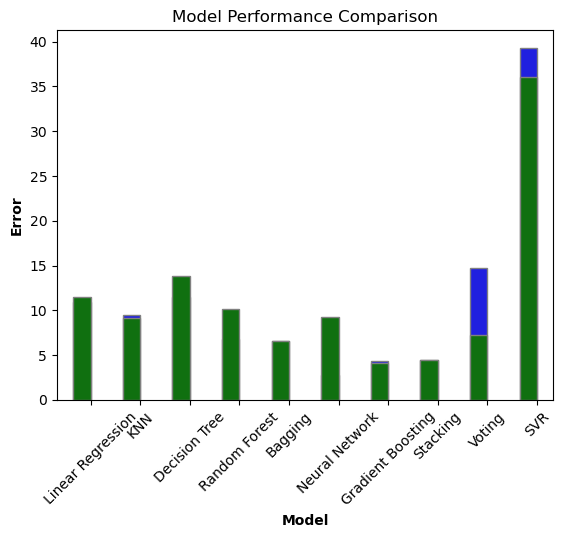

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# DataFrame with provided data
data = pd.DataFrame({
    'Model': ['Linear Regression', 'KNN', 'Decision Tree', 'Random Forest', 'Bagging', 'Neural Network', 'Gradient Boosting', 'Stacking', 'Voting', 'SVR'],
    'RMSE': [10.88, 9.50, 11.45, 6.80, 6.53, 2.75, 4.38, 4.48, 14.75, 39.30],
    'Grid Search CV': [11.50, 9.20, 13.79, 10.10, 6.53, 9.25, 4.16, 4.49, 7.27, 36.00]
})

sns.barplot(x=r1, y=data['RMSE'], color='blue', width=barWidth, edgecolor='grey', label='RMSE')
sns.barplot(x=r2, y=data['Grid Search CV'], color='green', width=barWidth, edgecolor='grey', label='Grid Search CV')

# Add labels and title
plt.xlabel('Model', fontweight='bold')
plt.ylabel('Error', fontweight='bold')
plt.title('Model Performance Comparison')
plt.xticks([r + barWidth / 2 for r in range(len(data))], data['Model'], rotation=45)

dfm = pd.melt(df, id_vars="data[RMSE]", var_name="data[Grid Search CV]", value_name="Model")
dfm
# Add legend
plt.legend()

# Show the plot
plt.show()


In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# DataFrame with provided data
data = pd.DataFrame({
    'Model': ['Linear Regression', 'KNN', 'Decision Tree', 'Random Forest', 'Bagging', 'Neural Network', 'Gradient Boosting', 'Stacking', 'Voting', 'SVR'],
    'RMSE': [10.88, 9.50, 11.45, 6.80, 6.53, 2.75, 4.38, 4.48, 14.75, 39.30],
    'Grid Search CV': [11.50, 9.20, 13.79, 10.10, 6.53, 9.25, 4.16, 4.49, 7.27, 36.00]
})

# Set the width of the bars
barWidth = 0.35

# Set the positions of the bars on the x-axis
r1 = range(len(data))
r2 = [x + barWidth for x in r1]

# Create the plot
plt.figure(figsize=(12, 6))
sns.barplot(x=r1, y=data['RMSE'], color='blue', width=barWidth, edgecolor='grey', label='RMSE')
sns.barplot(x=r2, y=data['Grid Search CV'], color='green', width=barWidth, edgecolor='grey', label='Grid Search CV')

# Add labels and title
plt.xlabel('Model', fontweight='bold')
plt.ylabel('Error', fontweight='bold')
plt.title('Model Performance Comparison')
plt.xticks([r + barWidth / 2 for r in range(len(data))], data['Model'], rotation=45)

# Add legend
plt.legend()

# Show the plot
plt.show()


AttributeError: 'bool' object has no attribute 'all'

<Figure size 1200x600 with 0 Axes>

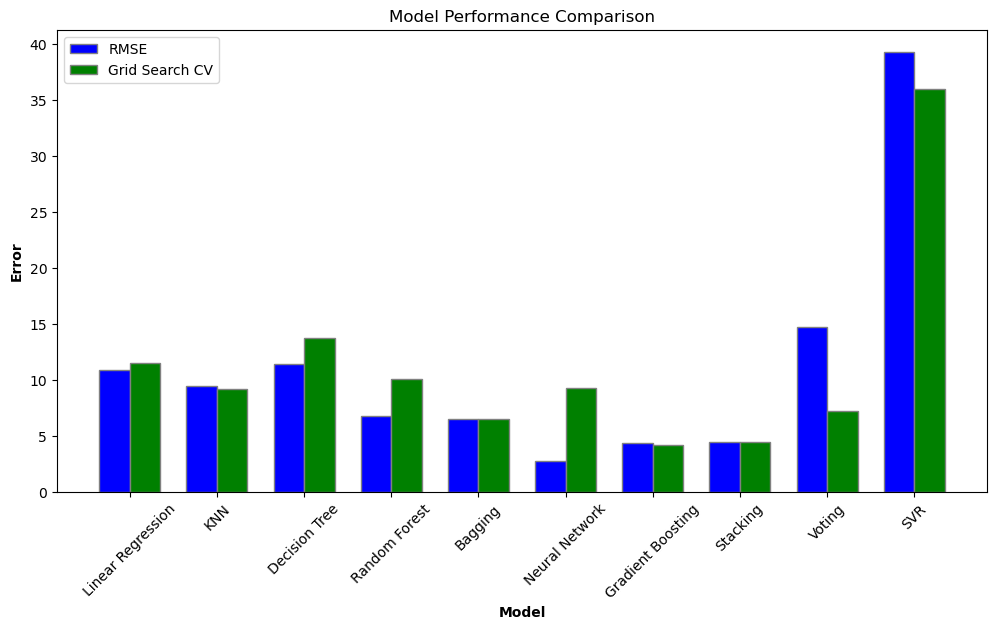

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# DataFrame with provided data
data = pd.DataFrame({
    'Model': ['Linear Regression', 'KNN', 'Decision Tree', 'Random Forest', 'Bagging', 'Neural Network', 'Gradient Boosting', 'Stacking', 'Voting', 'SVR'],
    'RMSE': [10.88, 9.50, 11.45, 6.80, 6.53, 2.75, 4.38, 4.48, 14.75, 39.30],
    'Grid Search CV': [11.50, 9.20, 13.79, 10.10, 6.53, 9.25, 4.16, 4.49, 7.27, 36.00]
})

# Set the width of the bars
barWidth = 0.35

# Set the positions of the bars on the x-axis
r1 = np.arange(len(data))
r2 = [x + barWidth for x in r1]

# Create the plot
plt.figure(figsize=(12, 6))

# Create bars
plt.bar(r1, data['RMSE'], color='blue', width=barWidth, edgecolor='grey', label='RMSE')
plt.bar(r2, data['Grid Search CV'], color='green', width=barWidth, edgecolor='grey', label='Grid Search CV')

# Add labels and title
plt.xlabel('Model', fontweight='bold')
plt.ylabel('Error', fontweight='bold')
plt.title('Model Performance Comparison')
plt.xticks([r + barWidth / 2 for r in range(len(data))], data['Model'], rotation=45)

# Add legend
plt.legend()

# Show the plot
plt.show()
